# Adult Income Dataset — A Data Storytelling Exploration

This notebook explores the Adult Income dataset, derived from the 1994 U.S. Census. The key question: **What factors influence whether a person earns more than $50,000 per year?**

## 1. Load & Inspect the Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("adult.csv") 
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df = df.replace('?', np.nan)
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
df = df.dropna()

In [75]:
# Convert numeric columns to float/int
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

# Drop any rows that became NaN after conversion
df = df.dropna(subset=numeric_cols)

# Confirm types
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
educational-num       int64
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
capital_net           int64
age_group          category
dtype: object

## 2. Exploratory Data Analysis

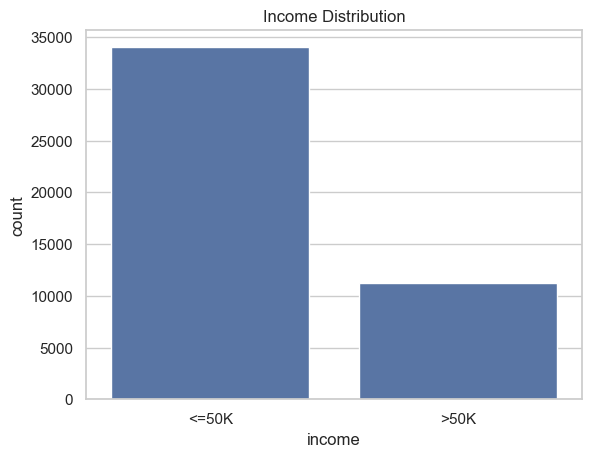

In [78]:
sns.countplot(data=df, x='income')
plt.title('Income Distribution')
plt.show()

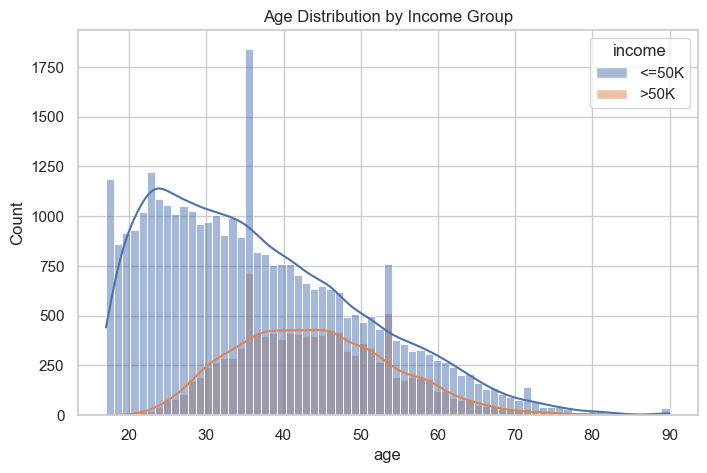

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="income", kde=True)
plt.title("Age Distribution by Income Group")
plt.show()

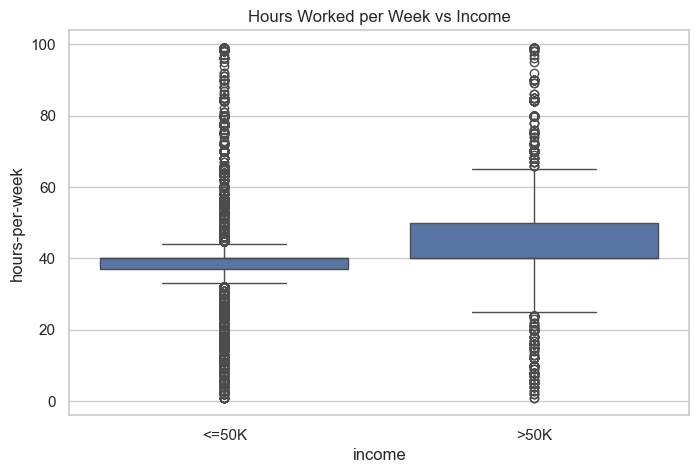

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="income", y="hours-per-week")
plt.title("Hours Worked per Week vs Income")
plt.show()

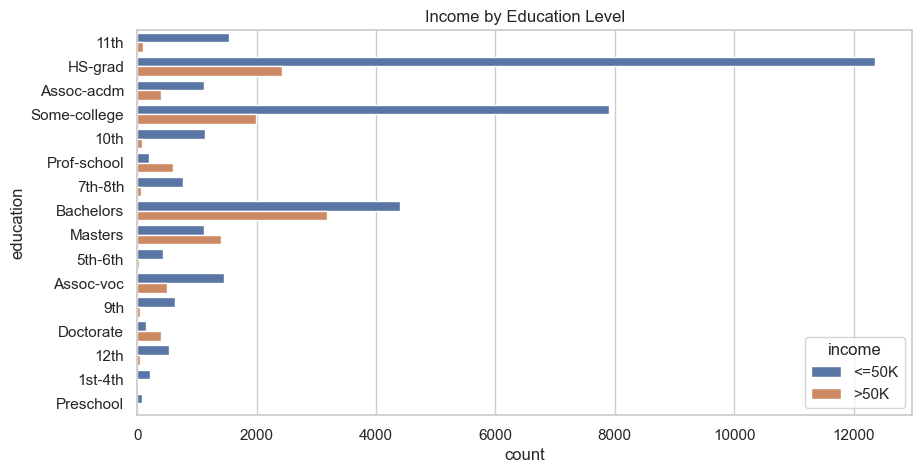

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="education", hue="income")
plt.title("Income by Education Level")
plt.show()

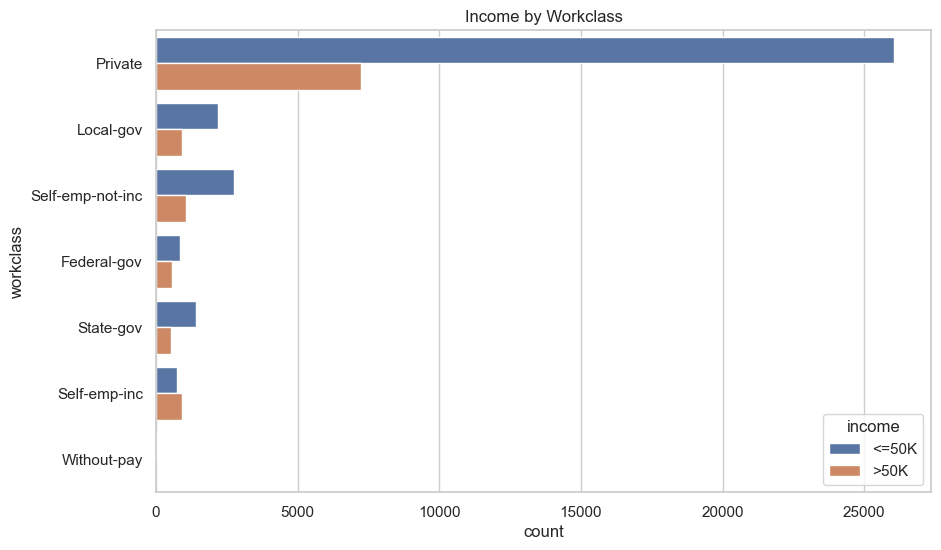

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="workclass", hue="income")
plt.title("Income by Workclass")
plt.show()

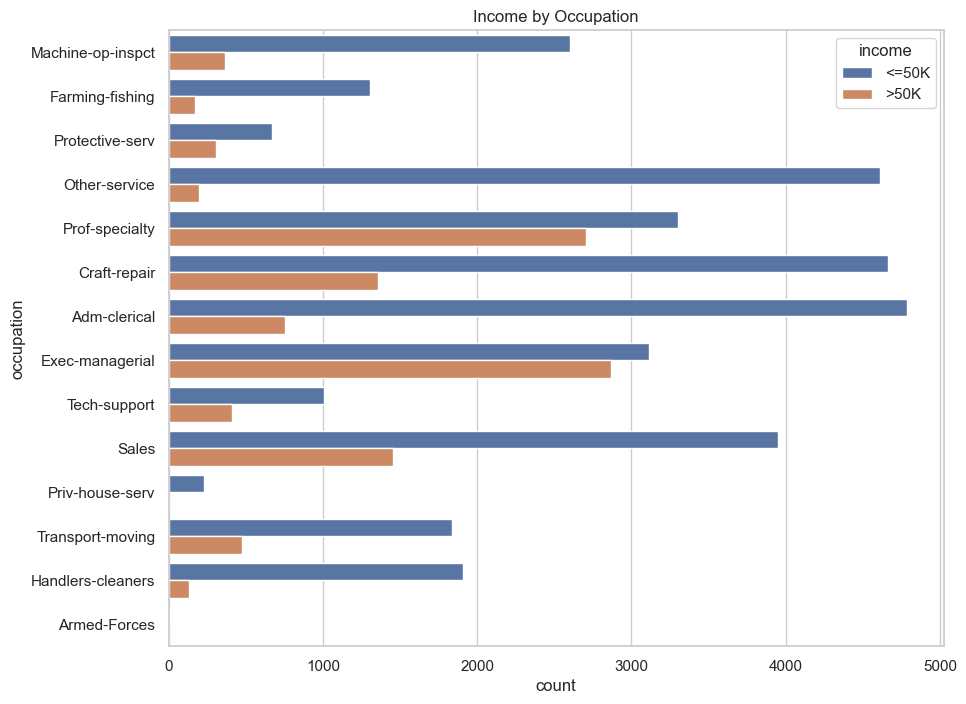

In [88]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, y="occupation", hue="income")
plt.title("Income by Occupation")
plt.show()

## 3. Feature Engineering

In [91]:
df['capital_net'] = df['capital-gain'] - df['capital-loss']

In [93]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 25, 40, 60, 100],
    labels=['Young', 'Adult', 'Mid-Career', 'Senior']
)

## 4. Deeper Storytelling Insights

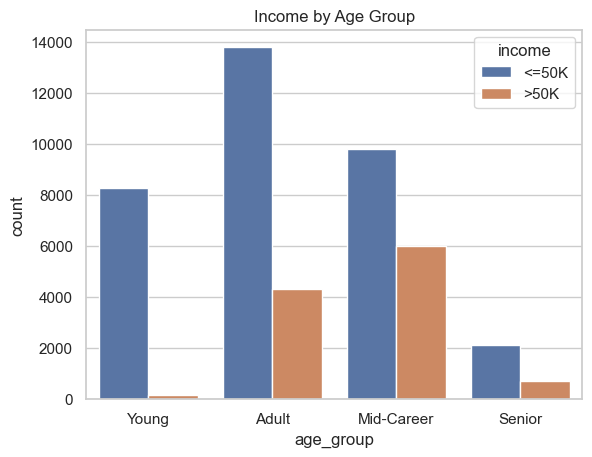

In [96]:
sns.countplot(data=df, x='age_group', hue='income')
plt.title('Income by Age Group')
plt.show()

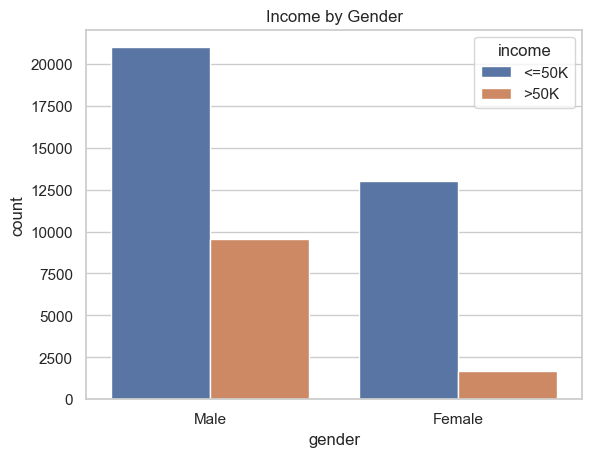

In [98]:
sns.countplot(data=df, x='gender', hue='income')
plt.title('Income by Gender')
plt.show()

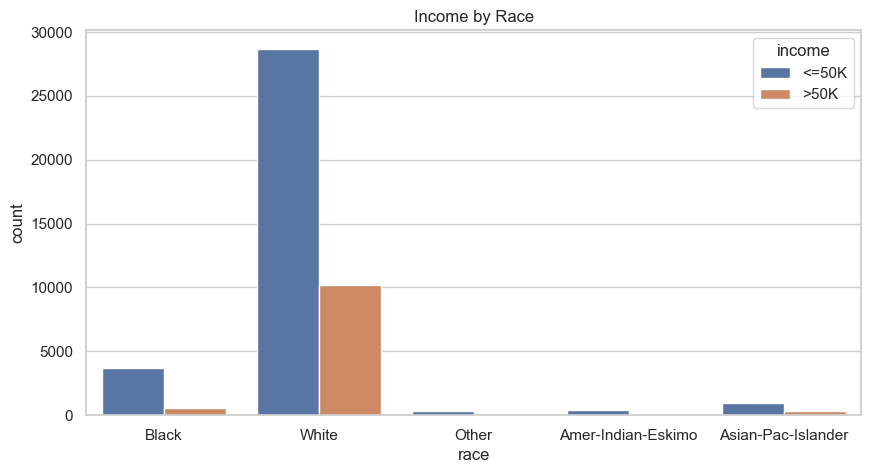

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='race', hue='income')
plt.title('Income by Race')
plt.show()

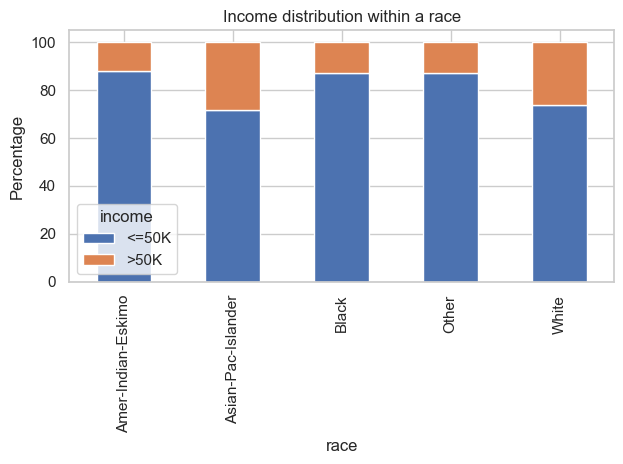

In [121]:
ct_percent = pd.crosstab(df["race"], df["income"], normalize="index") * 100
ct_percent.plot(kind="bar", stacked=True)
plt.title("Income distribution within a race")
plt.xticks(rotation='vertical')
plt.xlabel("race")
plt.ylabel("Percentage")
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

## 5. Predictive Model (Logistic Regression)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Convert numeric columns
numeric_cols = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.dropna(subset=numeric_cols)

# Ensure categorical columns are strings
categorical = X.select_dtypes(include='object').columns
X[categorical] = X[categorical].astype(str)

numeric = numeric_cols

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
    ("num", StandardScaler(), numeric)
])

model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(solver='saga', max_iter=3000,class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.80      0.86     10241
           1       0.58      0.85      0.69      3326

    accuracy                           0.81     13567
   macro avg       0.76      0.82      0.77     13567
weighted avg       0.85      0.81      0.82     13567



## 6. Feature Importance

In [113]:
logreg = model.named_steps["clf"]
ohe = model.named_steps["prep"].named_transformers_["cat"]

feature_names = list(ohe.get_feature_names_out(categorical)) + list(numeric)
coef = logreg.coef_[0]

importance_df = pd.DataFrame({"feature": feature_names, "coeff": coef})
importance_df = importance_df.sort_values("coeff", ascending=False)

importance_df.head(10)

,feature,coeff
101,capital-gain,2.381777
25,marital-status_Married-civ-spouse,1.554913
66,native-country_France,1.090040
49,relationship_Wife,1.068369
24,marital-status_Married-AF-spouse,0.952410
88,native-country_Portugal,0.943732
78,native-country_Italy,0.930047
65,native-country_England,0.901304
33,occupation_Exec-managerial,0.860635
58,native-country_Canada,0.718864


## 7. Conclusion

**Key Findings:**  
- Education strongly predicts high income  
- Occupation and workclass influence income  
- Age, hours-per-week, and capital gains also important  
- Gender and race disparities visible  

**Model Interpretation:**  
Logistic regression highlights top features affecting >$50K income  

**Final Thoughts:**  
Patterns show socio-economic inequality; dataset is 1994 U.S. census, but insights remain relevant